In [34]:
import sqlite3
import pandas as pd

In [35]:
conn = sqlite3.connect('database.db')

In [36]:
Subjects = {
    'Экономика': 'economics',
    'Английский язык': 'english',
    'Немецкий язык': 'german',
    'ОБЖ': 'obzh',
    'Обществознание': 'social'
}

# Данетки

In [48]:
yesno = pd.read_sql_query('SELECT * FROM "Задачи да/нет-ки"', conn)
yesno.columns

Index(['Номер задачи', 'Тело вопроса', 'Верный ответ', 'Предмет', 'Источник',
       'Можно в метро', 'Тема', 'Количество решений', 'Количество верных',
       'Есть ли картинка', 'Картинка', 'тип'],
      dtype='object')

In [49]:
yesno = yesno.rename(
    columns={
        'Номер задачи': 'question_id',
        'Тело вопроса': 'ask_text',
        'Верный ответ': 'right_answer',
        'Предмет': 'subject',
        'Источник': 'source',
        'Можно в метро': 'may_in_subway',
        'Тема': 'theme',
        'Количество решений': 'number_of_decisions',
        'Количество верных': 'number_of_correct_decisions',
        'Есть ли картинка': 'have_photo',
        'Картинка': 'photo_url'
    }
).drop(columns=['тип', 'question_id'])

yesno.index.names = ['question_id']

In [50]:
yesno.head(1)

,ask_text,right_answer,subject,source,may_in_subway,theme,number_of_decisions,number_of_correct_decisions,have_photo,photo_url
question_id,,,,,,,,,,
0,Если Вы вкладываете в банк на счёт $100 при ст...,0,Экономика,MOSH,1,mathematics,0,0,0,None


In [51]:
yesno.subject.unique()

array(['Экономика', 'Английский язык', 'Обществознание', 'Немецкий язык'],
      dtype=object)

In [52]:
yesno.subject = yesno.subject.apply(Subjects.__getitem__)

In [53]:
yesno.subject.unique()

array(['economics', 'english', 'social', 'german'], dtype=object)

### Очищаем данные

In [67]:
yesno.right_answer = yesno.right_answer.apply(lambda x: x if x != '=1' else 1)

### Расставляем в верном порядке

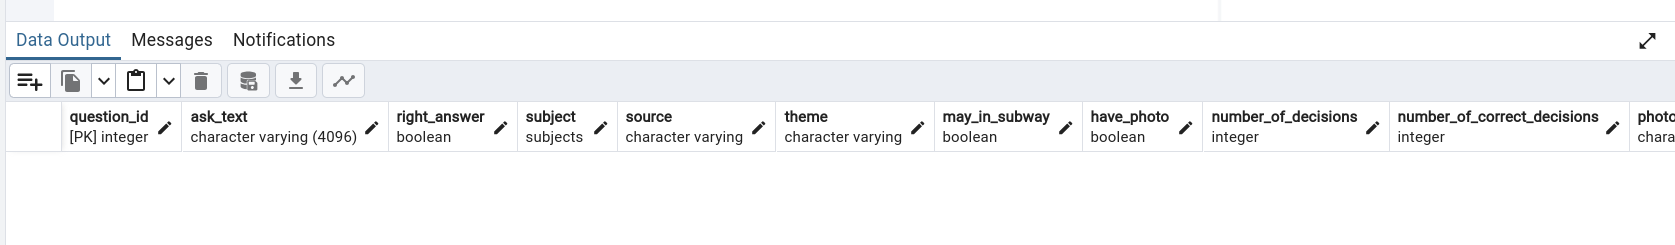

In [59]:
yesno = yesno[['ask_text', 'right_answer', 'subject', 'source', 'theme', 'may_in_subway', 'have_photo', 'number_of_decisions', 'number_of_correct_decisions', 'photo_url']]

In [68]:
yesno.to_csv('yesno.csv')